In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#c = tf.constant(1)
#d = tf.Variable(1)

* Linear regression.
* Loss parametric of (w)
* Compute gradients and update
* Use optimizer to minimize loss
* Use LinearRegression (estimator) to find a line
* play and see how loss is effected
* Create custom Estimator based on optimizer which can be used as a package

* Redo the whole thing for various parametric forms. [[degree n]]

# Data

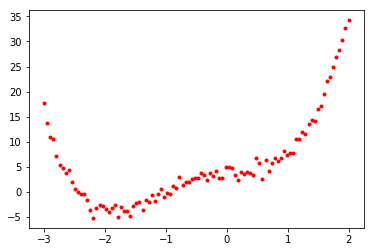

In [73]:
X = np.linspace(-3, 2, 100)
Y = X**4 + 2*X**3 - X**2 + X * 2 + 4 + np.random.normal(0, 1,X.size)
plt.plot(X, Y, 'r.')
plt.show()

# numpy

In [4]:
p = 1
_X = X.reshape(-1,1)
X_input = np.hstack([_X**n for n in range(p + 1)])

w = np.random.normal(0, 1, p + 1)

Y_pred = X_input.dot(w)

In [5]:
Y_pred.shape, X_input.shape, X.shape, w.shape

((100,), (100, 2), (100,), (2,))

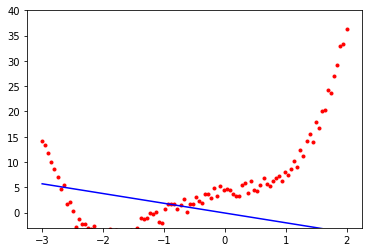

In [6]:
plt.plot(X, Y, 'r.')
plt.plot(X, Y_pred, 'b')
plt.ylim(-3, 40)
plt.show()

### hstack

In [7]:
t=np.array([1,2,3,4]).reshape(-1,1)

In [8]:
np.hstack([t,t,t])
# hstack binds .. but the data should have been reshaped. It treats (x,) ~ vectors as (1,x) while joining them

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

# TF -- scalars

In [9]:
# Define a single operation
# Operation is on a placeholder
x = tf.placeholder(dtype=tf.float32)
y_pred = tf.placeholder(dtype=tf.float32)

# variables
b = tf.Variable([1], dtype=tf.float32)
w = tf.Variable([-1], dtype=tf.float32)

# y

y = b + x * w
print y.shape

# loss
error = y_pred - y
loss = tf.reduce_sum(error ** 2)

<unknown>


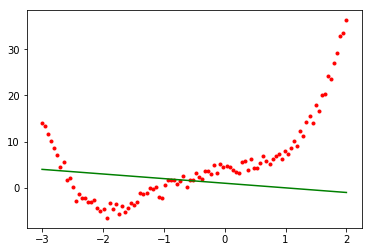

In [10]:
res = None
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    res = sess.run(y, {x: X})

res.shape
plt.plot(X, Y, 'r.')
plt.plot(X, res, 'g')
plt.show()

### Optimizer

In [11]:
learning_rate = 1e-5
gdo = tf.train.GradientDescentOptimizer(learning_rate)
optimizer = gdo.minimize(loss)

[3.6584136] [6.046936]
(100,) 45.11349609375


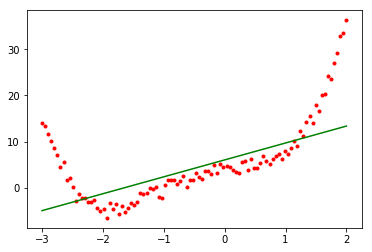

In [12]:
n_steps = 1000
with tf.Session() as sess:
    sess.run(init)
    for i in range(n_steps):
        (_, w_val, b_val) = sess.run((optimizer, w, b), {x: X, y_pred: Y})
    print w_val, b_val
    (res, loss_res) = sess.run((y, loss), {x: X, y_pred: Y})

print res.shape, loss_res / X.shape[0]
plt.plot(X, Y, 'r.')
plt.plot(X, res, 'g')
plt.show()

## TF -- Scalar using LinearRegression

In [13]:
feature_columns = [tf.feature_column.numeric_column("X")]
lr = tf.estimator.LinearRegressor(feature_columns=feature_columns)
input_fn = tf.estimator.inputs.numpy_input_fn({"X": X}, Y, batch_size=10, num_epochs=100, shuffle=True)
lr.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11bc56090>, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/1k/0mbw6yb531v01963w262zblc682jgh/T/tmpqxkAjC', '_save_summary_steps': 100}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/1k/0mbw6yb531v01963w262zblc682jgh/T/tmpqxkAjC/model.ckpt.
INFO:tensorflow:loss = 1616.9121, step = 1
INFO:tensorflow:global_step/sec: 1048.35
INFO:tensorflow:loss = 498.90216, step = 101 (0.097 sec)
INFO:tensorflow:global_step/sec: 1429.55
INFO:tensorflow:loss = 375.0212, step =

INFO:tensorflow:Starting evaluation at 2018-01-19-12:05:35
INFO:tensorflow:Restoring parameters from /var/folders/1k/0mbw6yb531v01963w262zblc682jgh/T/tmpqxkAjC/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-01-19-12:05:35
INFO:tensorflow:Saving dict for global step 1000: average_loss = 43.976906, global_step = 1000, loss = 4397.6904
INFO:tensorflow:Restoring parameters from /var/folders/1k/0mbw6yb531v01963w262zblc682jgh/T/tmpqxkAjC/model.ckpt-1000
(100, 1) 43.976906


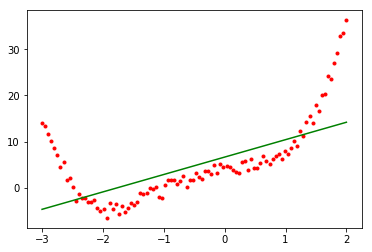

In [14]:
predict_input_fn = tf.estimator.inputs.numpy_input_fn({"X": X}, Y, shuffle=False)
loss_res = (lr.evaluate(input_fn=predict_input_fn))["average_loss"] 
res = np.array([i["predictions"] for i in lr.predict(input_fn=predict_input_fn)])
print res.shape, loss_res
plt.plot(X, Y, 'r.')
plt.plot(X, res, 'g')
plt.show()

In [15]:
[(i, lr.get_variable_value(i)) for i in lr.get_variable_names()]


[('global_step', 1000),
 ('linear/linear_model/X/weights', array([[3.7679884]], dtype=float32)),
 ('linear/linear_model/X/weights/part_0/Ftrl',
  array([[11263181.]], dtype=float32)),
 ('linear/linear_model/X/weights/part_0/Ftrl_1',
  array([[-63228.098]], dtype=float32)),
 ('linear/linear_model/bias_weights', array([6.658148], dtype=float32)),
 ('linear/linear_model/bias_weights/part_0/Ftrl',
  array([3789563.5], dtype=float32)),
 ('linear/linear_model/bias_weights/part_0/Ftrl_1',
  array([-64806.418], dtype=float32))]

In [16]:
def model_funx(features, labels, mode, params=None):
    
    w = tf.get_variable('w', [1], dtype=tf.float64)
    b = tf.get_variable('b', [1], dtype=tf.float64)
    x = features['X']
    y = w * x + b
    
    predictions = y
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(
        mode=mode,
        predictions=predictions,
        loss=None,
        train_op=None
    )
    
    loss = tf.reduce_sum(tf.square(y-labels)) / tf.cast(tf.shape(y), dtype=tf.float64)
    global_step = tf.train.get_global_step()

    optimizer = tf.train.GradientDescentOptimizer(params.get("learning_rate",0.2))
    train_op = tf.group(optimizer.minimize(loss), tf.assign_add(global_step, 1))
    
    return tf.estimator.EstimatorSpec(
        mode=mode,
        predictions=predictions,
        loss=loss,
        train_op=train_op
    )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11bf0e990>, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/1k/0mbw6yb531v01963w262zblc682jgh/T/tmp68LhDU', '_save_summary_steps': 100}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/1k/0mbw6yb531v01963w262zblc682jgh/T/tmp68LhDU/model.ckpt.
INFO:tensorflow:loss = 27.930361934451717, step = 1
INFO:tensorflow:global_step/sec: 1267.41
INFO:tensorflow:loss = 11.110410286156956, step = 101 (0.081 sec)
INFO:tensorflow:global_step/sec: 1406.12
INFO:tensorflow:loss 

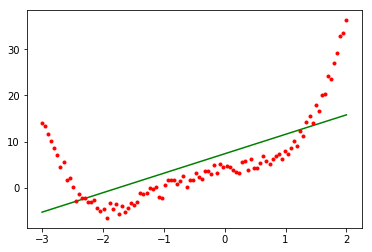

In [17]:
estimator = tf.estimator.Estimator(model_fn=model_funx, params = {"learning_rate": 0.02})
estimator.train(input_fn=input_fn)
res = np.array([i for i in estimator.predict(input_fn=predict_input_fn)])
loss_res = estimator.evaluate(input_fn=predict_input_fn)
print res.shape, loss_res
plt.plot(X, res, "g")
plt.plot(X, Y, "r.")
plt.show()

**Playground**

In [18]:
npa = np.array(range(1,10)).reshape(3,-1)
npb = npa + 2
print npa.shape, npa
print npb
print npa[0,:]

print npa.dot(npb)

(3, 3) [[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[1 2 3]
[[ 42  48  54]
 [ 96 111 126]
 [150 174 198]]


In [19]:
with tf.Session() as sess:
    a = tf.constant(npa, dtype=tf.float32)
    b = tf.constant(npb, dtype=tf.float32)
    sess.run(init)
    print sess.run([tf.matmul(a, b)])

[array([[ 42.,  48.,  54.],
       [ 96., 111., 126.],
       [150., 174., 198.]], dtype=float32)]


**Shape (1,3,3)**

In [20]:
npa = np.array(range(1,10)).reshape(1,3,-1)
npb = npa + 2
print npa.shape, npa
print npb
print npa[0,:]

print npa.dot(npb)

(1, 3, 3) [[[1 2 3]
  [4 5 6]
  [7 8 9]]]
[[[ 3  4  5]
  [ 6  7  8]
  [ 9 10 11]]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[[[ 42  48  54]]

  [[ 96 111 126]]

  [[150 174 198]]]]


In [21]:
with tf.Session() as sess:
    a = tf.constant(npa, dtype=tf.float32)
    b = tf.constant(npb, dtype=tf.float32)
    sess.run(init)
    print sess.run([tf.matmul(a, b)])

[array([[[ 42.,  48.,  54.],
        [ 96., 111., 126.],
        [150., 174., 198.]]], dtype=float32)]


**Shape(2,3,3)**

In [22]:
npa = np.array(range(1,10)).reshape(3,-1)
npa = np.stack([npa, npa], axis=0)
npb = npa + 2
print npa.shape, npa
print npb
print npa[0,:]

print npa.dot(npb)

(2, 3, 3) [[[1 2 3]
  [4 5 6]
  [7 8 9]]

 [[1 2 3]
  [4 5 6]
  [7 8 9]]]
[[[ 3  4  5]
  [ 6  7  8]
  [ 9 10 11]]

 [[ 3  4  5]
  [ 6  7  8]
  [ 9 10 11]]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[[[ 42  48  54]
   [ 42  48  54]]

  [[ 96 111 126]
   [ 96 111 126]]

  [[150 174 198]
   [150 174 198]]]


 [[[ 42  48  54]
   [ 42  48  54]]

  [[ 96 111 126]
   [ 96 111 126]]

  [[150 174 198]
   [150 174 198]]]]


In [23]:
with tf.Session() as sess:
    a = tf.constant(npa, dtype=tf.float32)
    b = tf.constant(npb, dtype=tf.float32)
    sess.run(init)
    print sess.run([tf.matmul(a, b)])

[array([[[ 42.,  48.,  54.],
        [ 96., 111., 126.],
        [150., 174., 198.]],

       [[ 42.,  48.,  54.],
        [ 96., 111., 126.],
        [150., 174., 198.]]], dtype=float32)]


# Polynomial regression

In [74]:
p = 4
features = {"X"+str(i): X**i for i in range(1,p+1)}
feature_columns = [tf.feature_column.numeric_column("X"+str(x)) for x in range (1, p+1)]
lr = tf.estimator.LinearRegressor(feature_columns=feature_columns)
input_fn = tf.estimator.inputs.numpy_input_fn(features, Y, batch_size=10, num_epochs=100, shuffle=True)
lr.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11e681390>, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/1k/0mbw6yb531v01963w262zblc682jgh/T/tmpLWRRDF', '_save_summary_steps': 100}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/1k/0mbw6yb531v01963w262zblc682jgh/T/tmpLWRRDF/model.ckpt.
INFO:tensorflow:loss = 1363.1824, step = 1
INFO:tensorflow:global_step/sec: 893.521
INFO:tensorflow:loss = 43.704643, step = 101 (0.114 sec)
INFO:tensorflow:global_step/sec: 1119.86
INFO:tensorflow:loss = 15.841631, step 

INFO:tensorflow:Starting evaluation at 2018-01-19-12:26:42
INFO:tensorflow:Restoring parameters from /var/folders/1k/0mbw6yb531v01963w262zblc682jgh/T/tmpLWRRDF/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-01-19-12:26:43
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.034121, global_step = 1000, loss = 103.41211
INFO:tensorflow:Restoring parameters from /var/folders/1k/0mbw6yb531v01963w262zblc682jgh/T/tmpLWRRDF/model.ckpt-1000
(100, 1) 1.034121


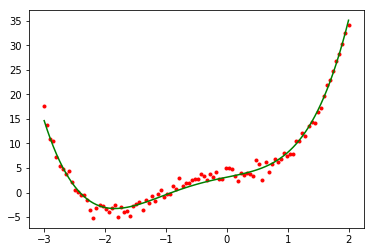

In [75]:
predict_input_fn = tf.estimator.inputs.numpy_input_fn(features, Y, shuffle=False)
loss_res = (lr.evaluate(input_fn=predict_input_fn))["average_loss"] 
res = np.array([i["predictions"] for i in lr.predict(input_fn=predict_input_fn)])
print res.shape, loss_res
plt.plot(X, Y, 'r.')
plt.plot(X, res, 'g')
plt.show()


In [76]:
[(i, lr.get_variable_value(i)) for i in lr.get_variable_names()]


[('global_step', 1000),
 ('linear/linear_model/X1/weights', array([[2.5568335]], dtype=float32)),
 ('linear/linear_model/X1/weights/part_0/Ftrl',
  array([[978489.2]], dtype=float32)),
 ('linear/linear_model/X1/weights/part_0/Ftrl_1',
  array([[-12645.92]], dtype=float32)),
 ('linear/linear_model/X2/weights', array([[-0.09062976]], dtype=float32)),
 ('linear/linear_model/X2/weights/part_0/Ftrl',
  array([[2341429.8]], dtype=float32)),
 ('linear/linear_model/X2/weights/part_0/Ftrl_1',
  array([[693.39606]], dtype=float32)),
 ('linear/linear_model/X3/weights', array([[1.74758]], dtype=float32)),
 ('linear/linear_model/X3/weights/part_0/Ftrl',
  array([[20259024.]], dtype=float32)),
 ('linear/linear_model/X3/weights/part_0/Ftrl_1',
  array([[-39329.31]], dtype=float32)),
 ('linear/linear_model/X4/weights', array([[0.8296776]], dtype=float32)),
 ('linear/linear_model/X4/weights/part_0/Ftrl',
  array([[1.0679629e+08]], dtype=float32)),
 ('linear/linear_model/X4/weights/part_0/Ftrl_1',
  arr